In [1]:
from astropy.table import Table 
import numpy as np
import pandas as pd

In [2]:
data = Table.read('/home/praveen/Dropbox/Masters/mnras-cotar-data/data.fits', format='fits')

In [3]:
df = data.to_pandas()

In [4]:
df_new_emiss = df.loc[df['emiss']== True]
#df_new_emiss = df

In [5]:
df_new_emiss_25 = df_new_emiss.loc[df_new_emiss["Ha_EW"]> 0.25]

In [6]:
df_new_emiss_25.describe() #looks like both emiss = True and Ha_EW cuts have been applied to get the canonical set of 30 emitters 

,source_id,sobject_id,ra,dec,Ha_EW,Hb_EW,Ha_EW_abs,Hb_EW_abs,Ha_W10,Ha_EW_asym,Hb_EW_asym,NII,SII,NII_EW,SII_EW,rv_NII,rv_SII,flag
count,1.036400e+04,1.036400e+04,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.000000,10364.0
mean,4.932548e+18,1.608307e+14,176.270600,-32.948747,0.539949,0.190844,0.597718,0.369719,120.965508,-0.034505,-0.016219,0.300367,0.333655,0.049126,0.030255,-8.020126,16.953709,0.0
std,1.444722e+18,1.456705e+13,88.999638,25.789841,0.420589,0.319482,0.417266,0.319136,70.489822,0.284041,0.175336,0.645799,0.676469,0.162967,0.094534,129.824463,90.013428,0.0
min,9.999990e+05,1.311160e+14,0.030917,-84.323028,0.250070,-1.044938,0.250397,0.032432,7.686801,-0.950479,-0.822583,0.000000,0.000000,-1.722976,-0.625855,-1001.964172,-1213.608765,0.0
25%,3.907064e+18,1.504090e+14,90.464510,-54.419222,0.298572,0.018097,0.354413,0.173028,75.629028,-0.148825,-0.108449,0.000000,0.000000,0.000000,0.000000,-66.109142,-31.169254,0.0
50%,5.399631e+18,1.605290e+14,176.726354,-32.323681,0.392470,0.107405,0.460104,0.271784,102.251987,-0.050843,-0.022843,0.000000,0.000000,0.009802,0.006138,-11.920639,21.684663,0.0
75%,6.081855e+18,1.706030e+14,247.293552,-14.672653,0.592625,0.259134,0.670201,0.449919,146.016613,0.063773,0.071530,0.000000,0.000000,0.039980,0.040359,41.766546,69.119946,0.0
max,6.908511e+18,1.902250e+14,359.955750,27.358889,5.369496,3.455562,5.369496,3.568714,975.369873,0.929261,0.855974,2.000000,2.000000,3.645667,3.566653,1056.195435,487.314606,0.0


In [7]:
df_full= pd.read_csv("/home/praveen/Dropbox/Masters/emission-mnras-cotar/GALAH_all_sobject_ids.csv") 

In [8]:
df_emiss_25_ids = pd.DataFrame(df_new_emiss_25["sobject_id"])

In [9]:
df_full_ids = pd.DataFrame(df["sobject_id"])
#df_all_ids = pd.DataFrame(df_all["sobject_id"])

In [10]:
df_temp = pd.merge(df_full_ids, df_emiss_25_ids, how='outer', indicator=True)
#df_temp = pd.merge(df_all_ids, df, how='outer', indicator=True)

In [11]:
df_temp

,sobject_id,_merge
0,131116000501002,left_only
1,131116000501003,left_only
2,131116000501004,left_only
3,131116000501005,left_only
4,131116000501006,left_only
...,...,...
658914,190225005301395,left_only
658915,190225005301396,left_only
658916,190225005301397,left_only
658917,190225005301398,left_only


In [12]:
df_temp["_merge"].value_counts() #the 30 canonical sources exist in GALAH

left_only     648555
both           10364
right_only         0
Name: _merge, dtype: int64

In [13]:
df_final_cands = df_temp.loc[df_temp["_merge"]=="both"]

In [14]:
df_final_cands.describe()

,sobject_id
count,1.036400e+04
mean,1.608307e+14
std,1.456705e+13
min,1.311160e+14
25%,1.504090e+14
50%,1.605290e+14
75%,1.706030e+14
max,1.902250e+14


In [16]:
nparray = df_final_cands["sobject_id"].to_numpy()
df = pd.DataFrame(nparray)
df.to_csv("best_emission_candidates.csv", header=False, index=False)

In [17]:
nparray

array([131116000501262, 131116000501383, 131116001001192, ...,
       190225005301142, 190225005301225, 190225005301392])

In [21]:
df = pd.DataFrame(nparray)

In [23]:
df.head()

,0
0,131116000501262
1,131116000501383
2,131116001001192
3,131116001001213
4,131116001001279


In [24]:
df.to_csv("best_emission_candidates.csv", header=False, index=False)

In [25]:
sobject_ids = df_final_cands["sobject_id"].to_numpy().tolist()
#sobject_ids = df_both["sobject_id"].to_numpy().tolist()

In [26]:
sobject_ids

[131116000501262,
 131116000501383,
 131116001001192,
 131116001001213,
 131116001001279,
 131116001001379,
 131118001901243,
 131118001901332,
 131118002401234,
 131118002401396,
 131118002901052,
 131118002901085,
 131118002901190,
 131118002901196,
 131118002901203,
 131118002901261,
 131118003401003,
 131118003401055,
 131118003401110,
 131118003401128,
 131118003401180,
 131118003401266,
 131118003401345,
 131118003401369,
 131119001201119,
 131119001201229,
 131119001201261,
 131119001201333,
 131120002501007,
 131120002501073,
 131120002501272,
 131120002501331,
 131120002501341,
 131120003001006,
 131120003001367,
 131120003501113,
 131120003501148,
 131120003501204,
 131121001901123,
 131121001901284,
 131121001901317,
 131121001901364,
 131122000301362,
 131123002001243,
 131123002501345,
 131123002501356,
 131123002501362,
 131123002501388,
 131123003001161,
 131123003001240,
 131123003001287,
 131123003001368,
 131123003501158,
 131123003501209,
 131123003501373,
 131216001

Let,s plot Camera 3 of these cannoical spectra

In [8]:
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import glob
# making the plots look good 
import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

# loading spectres for a resampling test https://spectres.readthedocs.io/en/latest/ 
from spectres import spectres
from matplotlib import gridspec

In [9]:
def read_spectra(sobject_id):
    fits_files = [[],[],[],[]]
    for each_ccd in [1,2,3,4]:
        fits_files[each_ccd-1] = glob.glob("/home/praveen/Dropbox/Masters/emission-mnras-cotar/data/"+str(sobject_id)+str(each_ccd)+".fits") #this is reading fits files from file and not downloading directly 

    spectrum = dict()
    for each_ccd in [1,2,3,4]: #GALAH uses indexing from 1 - 4
        if fits_files[each_ccd-1]!=[]: #just using zero indexing here 
            fits = pyfits.open(fits_files[each_ccd-1][0]) 
            
            # Extension 0: Reduced spectrum
            # Extension 1: Relative error spectrum
            # Extension 4: Normalised spectrum, NB: cut for CCD4

            # Extract wavelength grid for the reduced spectrum
            start_wavelength = fits[0].header["CRVAL1"]
            dispersion       = fits[0].header["CDELT1"]
            nr_pixels        = fits[0].header["NAXIS1"]
            reference_pixel  = fits[0].header["CRPIX1"]

            if reference_pixel == 0:
                reference_pixel = 1
            spectrum['wave_red_'+str(each_ccd)] = ((np.arange(0,nr_pixels)--reference_pixel+1)*dispersion+start_wavelength) #this is the reduced spectrum 

            # Extract wavelength grid for the normalised spectrum
            start_wavelength = fits[4].header["CRVAL1"]
            dispersion       = fits[4].header["CDELT1"]
            nr_pixels        = fits[4].header["NAXIS1"]
            reference_pixel  = fits[4].header["CRPIX1"]

            if reference_pixel == 0:
                reference_pixel=1
            spectrum['wave_norm_'+str(each_ccd)] = ((np.arange(0,nr_pixels)--reference_pixel+1)*dispersion+start_wavelength) #this is the normalised spectrum 

            # need to confirm how this is calculated 
            spectrum['sob_red_'+str(each_ccd)]  = np.array(fits[0].data)
            spectrum['uob_red_'+str(each_ccd)]  = np.array(fits[0].data * fits[1].data)

            # need to confirm how this is calculated 
            spectrum['sob_norm_'+str(each_ccd)] = np.array(fits[4].data)
            if each_ccd != 4:
                spectrum['uob_norm_'+str(each_ccd)] = np.array(fits[4].data * fits[1].data)
            else:
                # for normalised error of CCD4, only used appropriate parts of error spectrum
                spectrum['uob_norm_4'] = np.array(fits[4].data * (fits[1].data)[-len(spectrum['sob_norm_4']):])

            fits.close()
        else:
            spectrum['wave_red_'+str(each_ccd)] = []
            spectrum['wave_norm_'+str(each_ccd)] = []
            spectrum['sob_red_'+str(each_ccd)] = []
            spectrum['sob_norm_'+str(each_ccd)] = []
            spectrum['uob_red_'+str(each_ccd)] = []
            spectrum['uob_norm_'+str(each_ccd)] = []
    
    spectrum['wave_red'] = np.concatenate(([spectrum['wave_red_'+str(each_ccd)] for each_ccd in [1,2,3,4]]))
    spectrum['wave_norm'] = np.concatenate(([spectrum['wave_norm_'+str(each_ccd)] for each_ccd in [1,2,3,4]]))
    spectrum['sob_red'] = np.concatenate(([spectrum['sob_red_'+str(each_ccd)] for each_ccd in [1,2,3,4]]))
    spectrum['sob_norm'] = np.concatenate(([spectrum['sob_norm_'+str(each_ccd)] for each_ccd in [1,2,3,4]]))
    spectrum['uob_red'] = np.concatenate(([spectrum['uob_red_'+str(each_ccd)] for each_ccd in [1,2,3,4]]))
    spectrum['uob_norm'] = np.concatenate(([spectrum['uob_norm_'+str(each_ccd)] for each_ccd in [1,2,3,4]]))

    return spectrum #returns a 30 "row" dict of numpy array per row 'wave_red_x' is the key for the key value pair # need to look at camera 3 for lithium 

In [10]:
def plot_spectra(sobject_id, normalised=True):
    
    f, ccds = plt.subplots(4,1,figsize=(11.69, 8.27))
    kwargs_sob = dict(c = 'k', lw=0.5, label='Flux', rasterized=True)
    kwargs_error_spectrum = dict(color = 'grey', label='Flux error', rasterized=True)

    for each_ccd in [1,2,3,4]:
        ax=ccds[each_ccd-1]
        
        if normalised:
            red_norm = 'norm'
        else:
            red_norm = 'red'
            
        # Plot the uncertainty as grey background
        ax.fill_between(
            spectrum['wave_'+red_norm+'_'+str(each_ccd)],
            spectrum['sob_'+red_norm+'_'+str(each_ccd)] - spectrum['uob_'+red_norm+'_'+str(each_ccd)],
            spectrum['sob_'+red_norm+'_'+str(each_ccd)] + spectrum['uob_'+red_norm+'_'+str(each_ccd)],
            **kwargs_error_spectrum
            )
        
        # Overplot observed spectrum a bit thicker
        ax.plot(
            spectrum['wave_'+red_norm+'_'+str(each_ccd)],
            spectrum['sob_'+red_norm+'_'+str(each_ccd)],
            **kwargs_sob
            )
        
        if normalised:
            ax.set_ylabel('Flux [norm.]')
            ax.set_ylim(-0.1,1.3)
        else:
            ax.set_ylabel('Counts')
            ax.set_ylim(0,1.1*np.percentile(spectrum['sob_red_'+str(each_ccd)],q=95))
        if each_ccd == 1:
            ax.set_title(str(sobject_id))
            ax.set_xlim(4710,4905)
        if each_ccd == 2:
            ax.set_xlim(5645,5877.5)
        if each_ccd == 3:
            ax.set_xlim(6472.5,6740)
        if each_ccd == 4:
            ax.set_xlim(7580,7890)
            ax.set_xlabel('Wavelength [Å]')
        if each_ccd == 4:
            ax.legend(loc='lower left')             
    plt.tight_layout()
    
    plt.show()
    plt.close()
    
    return f

In [11]:
sobject_ids = [140312004501116,
 150429003101162,
 150429003101268,
 160123002601012,
 160130003601074,
 160422005701151,
 161107003901377,
 170408005001217,
 170413003601067,
 170508003301221,
 170603004101235,
 170604002101145,
 190206003501044,
 190210001601238,
 190210002401037,
 190210002401302,
 190211001601148,
 190211002201024,
 190211002201360,
 190212001601319,
 190212001601338,
 190212001601342,
 190212001601351,
 190223001701241,
 190224002101351]

In [12]:
GRID_SIZE = 0.06
LOWER_LAMBDA = 6472.5
UPPER_LAMBDA = 6740

regrid = np.arange(LOWER_LAMBDA, UPPER_LAMBDA, GRID_SIZE) 

def resample_spectra(spectrum, camera, verbose):

    spec_resample, spec_errs_resample = spectres(regrid,  spectrum['wave_norm_'+str(camera)], spectrum['sob_norm_'+str(camera)], spec_errs= spectrum['uob_norm_'+str(camera)],verbose=verbose) 

    return spec_resample, spec_errs_resample

In [13]:
regrid = np.arange(LOWER_LAMBDA, UPPER_LAMBDA, GRID_SIZE) 

In [14]:
def resample_spectra(spectrum, camera, verbose):

    spec_resample, spec_errs_resample = spectres(regrid,  spectrum['wave_norm_'+str(camera)], spectrum['sob_norm_'+str(camera)], spec_errs= spectrum['uob_norm_'+str(camera)],verbose=verbose) 

    return spec_resample, spec_errs_resample


In [15]:
#open an empty dict to store the results 
resampled_spectra_collection = {}
resampled_spectra_collection['spec_resample'] = []

resampled_error_collection = {}
resampled_error_collection['error_resample'] = []

In [16]:
for sobject_id in sobject_ids:
    #this is the normalised resampled spectra 
    temp_spectrum = resample_spectra(read_spectra(sobject_id), 3, False)
    temp_spectrum[0][np.isnan(temp_spectrum[0])] = 1 #padding 
    resampled_spectra_collection['spec_resample'].append(temp_spectrum[0])

    #these are the error spectra
    #calculate mean error for padding 

    non_na_values = temp_spectrum[1][~np.isnan(temp_spectrum[1])]
    mean_error = np.mean(non_na_values)

    temp_spectrum[1][np.isnan(temp_spectrum[1])] = mean_error
    resampled_error_collection['error_resample'].append(temp_spectrum[1])

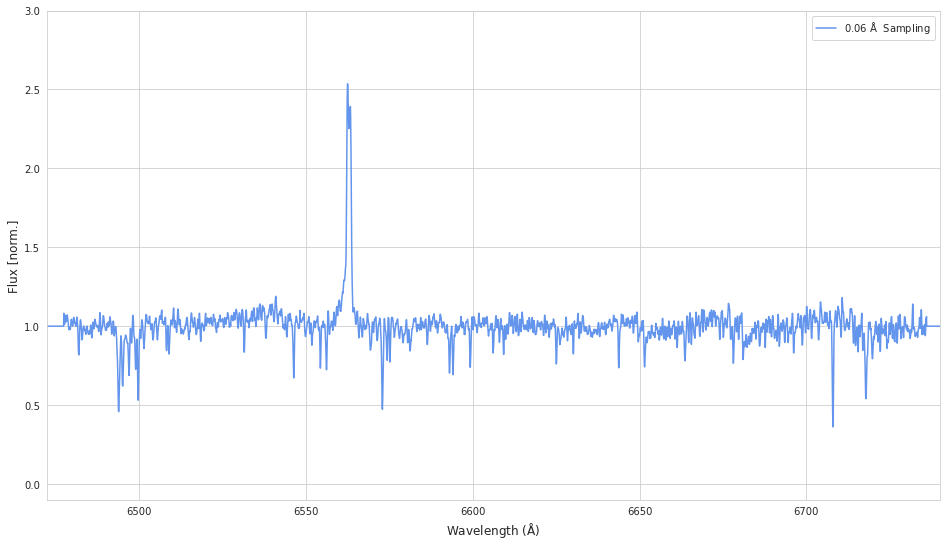

In [17]:
#test one spectrum 
f, ax = plt.subplots(figsize=(16,9))
ax.plot(regrid, resampled_spectra_collection['spec_resample'][8], color="cornflowerblue", lw=1.5, label=str(GRID_SIZE)+" $\mathrm{\AA}\ $ Sampling")
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim(-0.1,3.0) # turn this into an input 
ax.set_xlim(LOWER_LAMBDA, UPPER_LAMBDA)
#ax.set_xlim(6560, 6568)
ax.legend()
plt.show()

In [19]:
pltmask = range(1475,1550)

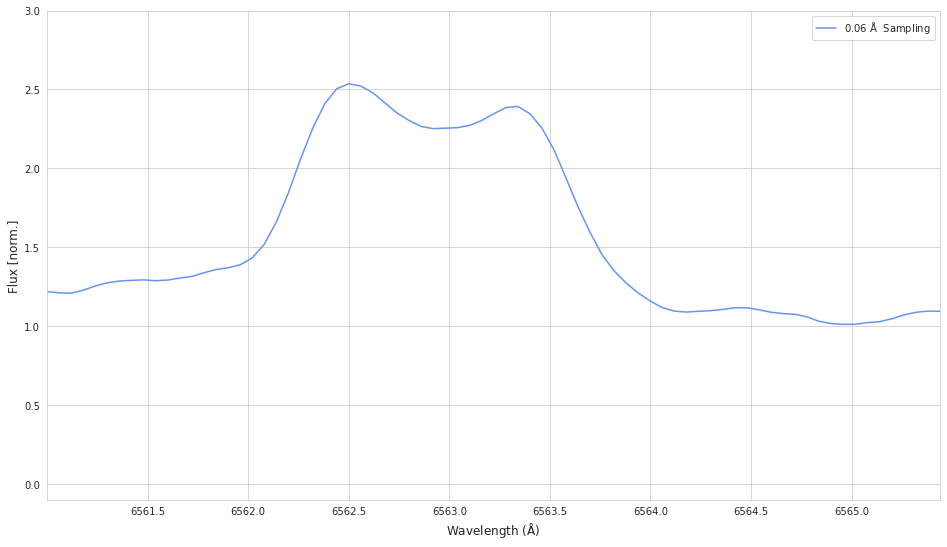

In [20]:
#test one spectrum 
f, ax = plt.subplots(figsize=(16,9))
ax.plot(regrid[pltmask], resampled_spectra_collection['spec_resample'][8][pltmask], color="cornflowerblue", lw=1.5, label=str(GRID_SIZE)+" $\mathrm{\AA}\ $ Sampling")
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim(-0.1,3.0) # turn this into an input 
#ax.set_xlim(LOWER_LAMBDA, UPPER_LAMBDA)
ax.set_xlim(regrid[pltmask].min(), regrid[pltmask].max() )
ax.legend()
plt.show()

Let's try a simple convolution/cross corr detector 

In [ ]:
resampled_spectra_collection['spec_resample'][8]

In [31]:
y = resampled_spectra_collection['spec_resample'][8][pltmask];
x = regrid[pltmask];

In [78]:
import pandas as pd 

In [85]:
df = pd.DataFrame.from_dict(resampled_spectra_collection["spec_resample"])

In [86]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [87]:
df.index = sobject_ids

In [88]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
140312004501116,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
150429003101162,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
150429003101268,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
160123002601012,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
160130003601074,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
df_new = df.loc[df['Ha_EW'] > 0.25]

In [5]:
df_new.head()

,source_id,sobject_id,ra,dec,Ha_EW,Hb_EW,Ha_EW_abs,Hb_EW_abs,Ha_W10,Ha_EW_asym,...,SB2_c1,NII,SII,NII_EW,SII_EW,rv_NII,rv_SII,nebular,emiss,flag
231,4670381423747904512,131116000501262,52.627542,-68.402472,0.295603,0.101599,0.337319,0.158579,100.878693,-0.395255,...,False,0,0,0.016717,0.010595,36.316257,-78.372826,False,True,0
332,4667391851631976704,131116000501383,54.661208,-68.449139,0.388567,-0.075878,0.554926,0.148901,88.601166,-0.301818,...,False,0,0,0.107995,-0.077812,181.271317,41.425713,False,True,0
347,4667325331178446464,131116000501399,55.710292,-68.626167,0.324683,0.267998,0.639117,0.474676,33.100037,-0.202321,...,False,1,1,0.032533,0.023944,35.702061,10.093763,False,False,4
420,4778371298299521536,131116001001192,65.619717,-56.529347,0.403987,0.322043,0.421977,0.378095,155.344238,0.007731,...,False,0,1,0.000000,0.045327,-25.077753,16.689327,False,True,0
432,4778479943792149376,131116001001213,65.677500,-56.303742,0.459616,0.223815,0.499301,0.303621,85.718796,-0.079094,...,False,0,0,0.020762,0.045525,13.959113,-38.025787,False,True,0


In [90]:
len(resampled_spectra_collection["spec_resample"])

25

In [100]:
corr_results = []

In [101]:
for i in range(len(resampled_spectra_collection["spec_resample"])):
    temp_value = np.correlate(resampled_spectra_collection["spec_resample"][i],y,"full")
    corr_results.append(temp_value)

    

In [102]:
corr_results

[array([1.09472765, 2.19027317, 3.27828175, ..., 3.63914179, 2.43029596,
        1.2188196 ]),
 array([1.09472765, 2.19027317, 3.27828175, ..., 3.63914179, 2.43029596,
        1.2188196 ]),
 array([1.09472765, 2.19027317, 3.27828175, ..., 3.63914179, 2.43029596,
        1.2188196 ]),
 array([1.09472765, 2.19027317, 3.27828175, ..., 3.63914179, 2.43029596,
        1.2188196 ]),
 array([1.09472765, 2.19027317, 3.27828175, ..., 3.63914179, 2.43029596,
        1.2188196 ]),
 array([1.09472765, 2.19027317, 3.27828175, ..., 3.63914179, 2.43029596,
        1.2188196 ]),
 array([1.09472765, 2.19027317, 3.27828175, ..., 3.63914179, 2.43029596,
        1.2188196 ]),
 array([1.09472765, 2.19027317, 3.27828175, ..., 3.63914179, 2.43029596,
        1.2188196 ]),
 array([1.09472765, 2.19027317, 3.27828175, ..., 3.63914179, 2.43029596,
        1.2188196 ]),
 array([1.09472765, 2.19027317, 3.27828175, ..., 3.63914179, 2.43029596,
        1.2188196 ]),
 array([1.09472765, 2.19027317, 3.27828175, ..., 3

In [135]:
corr_results[4][pltmask]

array([ 97.32415732,  97.62048061,  97.93190725,  98.26597279,
        98.62192392,  98.9947349 ,  99.38650903,  99.80029369,
       100.23044104, 100.66342076, 101.12644611, 101.62760581,
       102.15603552, 102.71635461, 103.31263357, 103.91333341,
       104.51545323, 105.13079712, 105.75324349, 106.38150064,
       107.01678518, 107.6499463 , 108.27993825, 108.91911978,
       109.55531947, 110.16272892, 110.75980684, 111.36480685,
       111.97287025, 112.58506196, 113.19564573, 113.81147413,
       114.44363227, 115.0983156 , 115.77908573, 116.48680404,
       117.21788981, 117.96721971, 118.74826103, 119.57839672,
       120.44807289, 121.34921333, 122.29500379, 123.2850118 ,
       124.31384052, 125.36632128, 126.41049573, 127.44452628,
       128.47617735, 129.4871951 , 130.45409279, 131.37237038,
       132.26154858, 133.1234513 , 133.93930582, 134.68283918,
       135.35464569, 135.95340167, 136.49073753, 136.98330223,
       137.42782526, 137.81407258, 138.14299268, 138.42

In [122]:
result4 = np.correlate(resampled_spectra_collection["spec_resample"][4], y, "full")

In [129]:
print(result4[pltmask])

[ 97.32415732  97.62048061  97.93190725  98.26597279  98.62192392
  98.9947349   99.38650903  99.80029369 100.23044104 100.66342076
 101.12644611 101.62760581 102.15603552 102.71635461 103.31263357
 103.91333341 104.51545323 105.13079712 105.75324349 106.38150064
 107.01678518 107.6499463  108.27993825 108.91911978 109.55531947
 110.16272892 110.75980684 111.36480685 111.97287025 112.58506196
 113.19564573 113.81147413 114.44363227 115.0983156  115.77908573
 116.48680404 117.21788981 117.96721971 118.74826103 119.57839672
 120.44807289 121.34921333 122.29500379 123.2850118  124.31384052
 125.36632128 126.41049573 127.44452628 128.47617735 129.4871951
 130.45409279 131.37237038 132.26154858 133.1234513  133.93930582
 134.68283918 135.35464569 135.95340167 136.49073753 136.98330223
 137.42782526 137.81407258 138.14299268 138.42093552 138.67099042
 138.89662685 139.07978427 139.21909062 139.3280151  139.41957109
 139.4748141  139.50980843 139.54172335 139.55995931 139.56212099]


In [33]:
import scipy.signal as signal

def xcorr(x,y):
    """
    Perform Cross-Correlation on x and y
    x    : 1st signal
    y    : 2nd signal

    returns
    lags : lags of correlation
    corr : coefficients of correlation
    """
    corr = signal.correlate(x, y, mode="full")
    lags = signal.correlation_lags(len(x), len(y), mode="full")
    return lags, corr

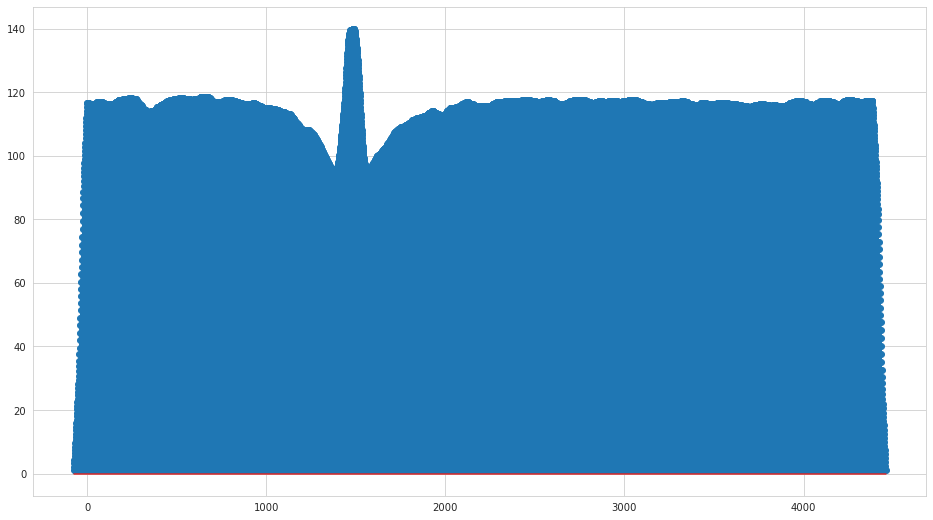

In [45]:
lags,c = xcorr(resampled_spectra_collection["spec_resample"][4], y);
plt.figure()
plt.stem(lags,c)
#plt.xlim([1300,1600])
plt.show()


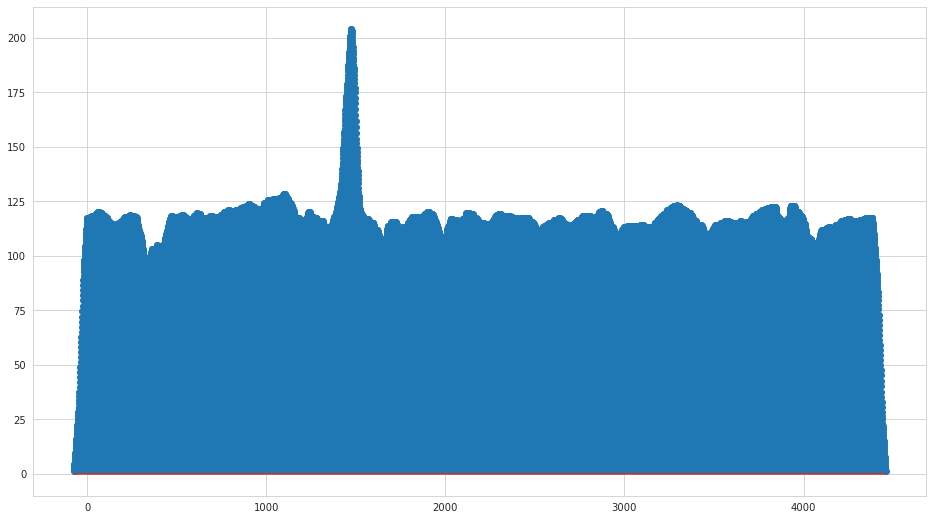

In [44]:
lags,c = xcorr(resampled_spectra_collection["spec_resample"][8], y);
plt.figure()
plt.stem(lags,c)
#plt.xlim([1300,1600])
plt.show()

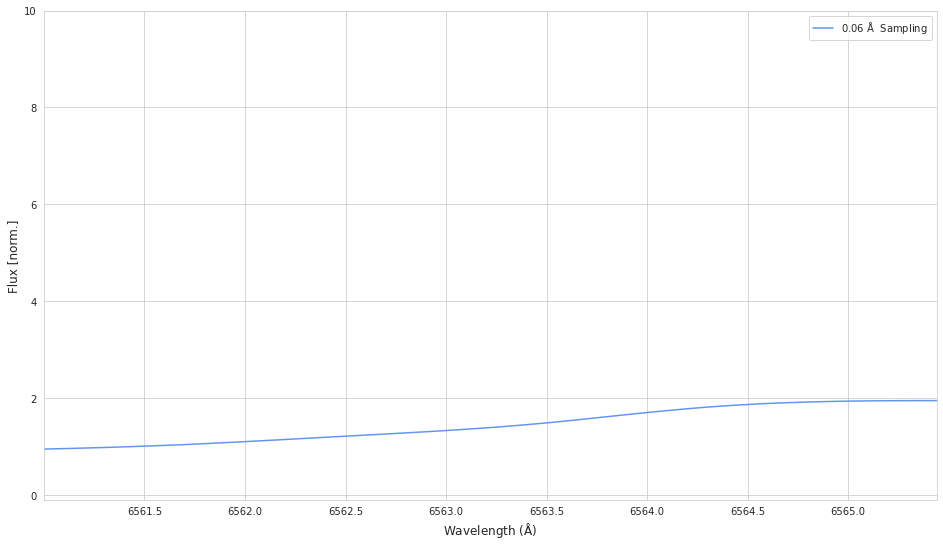

In [124]:
#test one spectrum 
f, ax = plt.subplots(figsize=(16,9))
ax.plot(regrid[pltmask], result4[pltmask]**2/10000, color="cornflowerblue", lw=1.5, label=str(GRID_SIZE)+" $\mathrm{\AA}\ $ Sampling")
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim(-0.1,10.0) # turn this into an input 
#ax.set_xlim(LOWER_LAMBDA, UPPER_LAMBDA)
ax.set_xlim(regrid[pltmask].min(), regrid[pltmask].max() )
ax.legend()
plt.show()

In [126]:
result1 = np.correlate(resampled_spectra_collection["spec_resample"][1], y, "full")

In [127]:
print(result1[pltmask]**2)

[14005.00322306 14041.39666195 14082.57910848 14123.64948
 14165.87157065 14218.57457352 14284.19289882 14356.91324763
 14430.63007633 14502.03059401 14574.45124383 14654.86927027
 14739.67992784 14822.26034007 14909.59675767 14997.39908474
 15092.1712403  15208.60749057 15350.28287895 15519.86856607
 15727.1153397  15987.46779529 16308.93912544 16677.83131772
 17084.48655835 17508.05280247 17932.16966747 18353.78312584
 18769.0163897  19167.11420287 19543.71327283 19905.9201467
 20268.68200296 20643.65393002 21038.37868799 21448.76824774
 21895.58069928 22385.87210794 22907.22341297 23443.52848759
 23977.06780412 24486.69285479 24955.04495375 25369.86853735
 25716.57846152 26025.48604177 26318.1611523  26620.09730789
 26950.45526707 27313.6012042  27712.30395363 28156.52142026
 28649.71635909 29177.14287748 29728.07644272 30309.90514687
 30902.02326236 31481.92594225 32045.77081354 32591.28081382
 33118.27193438 33630.98994212 34125.50928113 34606.66019549
 35097.55173382 35605.504419

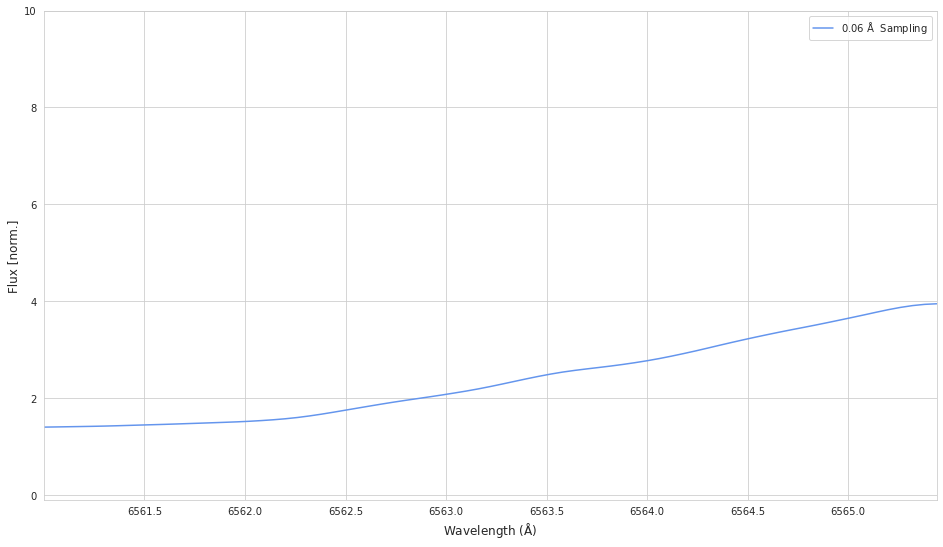

In [128]:
#test one spectrum 
f, ax = plt.subplots(figsize=(16,9))
ax.plot(regrid[pltmask], result1[pltmask]**2/10000, color="cornflowerblue", lw=1.5, label=str(GRID_SIZE)+" $\mathrm{\AA}\ $ Sampling")
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim(-0.1,10.0) # turn this into an input 
#ax.set_xlim(LOWER_LAMBDA, UPPER_LAMBDA)
ax.set_xlim(regrid[pltmask].min(), regrid[pltmask].max() )
ax.legend()
plt.show()

In [23]:
len(df_new["sobject_id"])

20686

In [24]:
x = df_new["sobject_id"].to_string(header=False,
                  index=False).split('\n')
vals = [','.join(ele.split()) for ele in x]
#print(vals)

In [25]:
nparray = np.asarray(vals, dtype=int)

In [26]:
nparray

array([131116000501262, 131116000501383, 131116000501399, ...,
       190225005301142, 190225005301225, 190225005301392])

In [27]:
len(nparray)

20686

In [28]:
import sys
np.set_printoptions(threshold=15000)


In [29]:
print(nparray)

[131116000501262 131116000501383 131116000501399 ... 190225005301142
 190225005301225 190225005301392]


In [30]:
nparray

array([131116000501262, 131116000501383, 131116001001192, 131116001001213,
       131116001001279, 131116001001379, 131118001901243, 131118001901332,
       131118002401234, 131118002401396, 131118002901052, 131118002901085,
       131118002901190, 131118002901196, 131118002901203, 131118002901261,
       131118003401003, 131118003401055, 131118003401110, 131118003401128,
       131118003401180, 131118003401266, 131118003401345, 131118003401369,
       131119001201119, 131119001201229, 131119001201261, 131119001201333,
       131120002501007, 131120002501073, 131120002501272, 131120002501331,
       131120002501341, 131120003001006, 131120003001367, 131120003501113,
       131120003501148, 131120003501204, 131121001901123, 131121001901284,
       131121001901317, 131121001901364, 131122000301362, 131123002001243,
       131123002501345, 131123002501356, 131123002501362, 131123002501388,
       131123003001161, 131123003001240, 131123003001287, 131123003001368,
       131123003501158, 1

In [32]:
df = pd.DataFrame(data=nparray, columns=["sobject_id"])

In [33]:
df.to_csv("emission_candidates.csv")

In [37]:
df

,sobject_id
0,131116000501262
1,131116000501383
2,131116000501399
3,131116001001192
4,131116001001213
...,...
20681,190225005301010
20682,190225005301089
20683,190225005301142
20684,190225005301225


In [34]:
df_full= pd.read_csv("/home/praveen/Dropbox/Masters/emission-mnras-cotar/GALAH_all_sobject_ids.csv") 

In [36]:
df_full.drop(['Unnamed: 0'], axis=1)

,sobject_id
0,170506004901085
1,170506004901086
2,170506004901087
3,170506004901088
4,170506004901089
...,...
588566,150606002401282
588567,150606002401284
588568,150606002401285
588569,150606002401286


In [38]:
df_temp = pd.merge(df_full, df, how='outer', indicator=True)

In [39]:
df_temp

,Unnamed: 0,sobject_id,_merge
0,0.0,170506004901085,left_only
1,1.0,170506004901086,left_only
2,2.0,170506004901087,left_only
3,3.0,170506004901088,left_only
4,4.0,170506004901089,left_only
...,...,...,...
594476,NaN,190223003301048,right_only
594477,NaN,190224002101232,right_only
594478,NaN,190224004201062,right_only
594479,NaN,190225002101298,right_only


In [40]:
df_temp["_merge"].value_counts()

left_only     573795
both           14776
right_only      5910
Name: _merge, dtype: int64

In [41]:
df_final_sobject_ids_temp = df_temp.loc[df_temp['_merge'] == "both"].drop(["Unnamed: 0","_merge"], axis=1)

In [43]:
df_final_sobject_ids_temp.to_csv("reduced_emission_candidates.csv")